In [15]:
from proj1_helpers import *
from implementations import *
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Read train_y=LABELS, train_x=FEATURES and train_id=EVENT_IDS from dataset.
subsamp = False
y, x, id_ = load_csv_data('../data/train.csv', sub_sample=subsamp)
y_out_test, x_out_test, id_out_test = load_csv_data('../data/test.csv', sub_sample=subsamp)

In [18]:
clean=False
degree = 2
feature_expansion = True
x_train, y_train, x_test, y_test = split_data(x, y, ratio=1, seed = 42)
if clean:
    # Clean data
    y_train, tx_train = clean_data(y_train, tx_train)
# Standardize data
x_train_std = standardize_features(x_train)
x_test_std = standardize_features(x_test)
x_train = x_train_std[0]
x_test = x_test_std[0]
# Build data matrix
tx_train = build_poly(x_train, degree)
tx_test = build_poly(x_test, degree)
tx_train.shape, tx_test.shape

((250000, 61), (0, 61))

# Gradient Descent

In [19]:
w_init = np.array([0] * tx_train.shape[1])
max_iter = 5000
gamma = 0.0009
w_gd, loss_gd = least_squares_GD(y_train,
                                 tx_train,
                                 w_init,
                                 max_iter,
                                 gamma,
                                 pr=True,
                                 adapt_gamma=False,
                                 kind='mse',
                                accel=True)
gd_prediction = predict_labels(w_gd, tx_test)
acc_gd = accuracy_ratio(gd_prediction, y_test)
print('Accuracy ratio = %.3f' % acc_gd)
print('Test loss = %.3f' % compute_loss(y_test, tx_test, w_gd))
print('Train loss = %.3f' % loss_gd)

GD (0/4999): loss=0.5
GD (100/4999): loss=0.33862756417594736
GD (200/4999): loss=0.3307009373822068
GD (300/4999): loss=0.32847987671460427
GD (400/4999): loss=0.3272745361263504
GD (500/4999): loss=0.32640451895899686
GD (600/4999): loss=0.32611844138862706
GD (700/4999): loss=0.3252543445931449
GD (800/4999): loss=0.32504589188847505
GD (900/4999): loss=0.32520888640048345
GD (1000/4999): loss=0.32502004966239345
GD (1100/4999): loss=0.32474911076108604
GD (1200/4999): loss=0.3248000216698159
GD (1300/4999): loss=0.3248794886322458
GD (1400/4999): loss=0.3250758366512016
GD (1500/4999): loss=0.32492172025002697
GD (1600/4999): loss=0.324773902056429
GD (1700/4999): loss=0.3249212691650208
GD (1800/4999): loss=0.3248185515624715
GD (1900/4999): loss=0.3246765031920483
GD (2000/4999): loss=0.32461928195026984
GD (2100/4999): loss=0.3245721685170827
GD (2200/4999): loss=0.3246012195678137
GD (2300/4999): loss=0.3245377643418787
GD (2400/4999): loss=0.32439201432540826
GD (2500/4999): l

ZeroDivisionError: float division by zero

np.savetxt('../data/w_gd_acc.dat', w_gd)

# Stochastic Gradient Descent

In [23]:
w_init = np.array([0] * tx_train.shape[1])
max_iter = 5000
gamma = 1e-2
batch_size = 1

w_sgd, loss_sgd = least_squares_SGD(y_train,
                                    tx_train,
                                    w_init,
                                    batch_size,
                                    max_iter,
                                    gamma,
                                    pr=True,
                                    adapt_gamma=False,
                                    choose_best=True)
sgd_prediction = predict_labels(w_sgd, tx_test)
acc_sgd = accuracy_ratio(sgd_prediction, y_test)
print('Accuracy ratio = %.2f' % acc_sgd)
print('Test loss = %.2e' % compute_loss(y_test, tx_test, w_sgd))
print('Train loss = %.2e' % loss_sgd)

SGD (0/4999): loss=0.5
SGD (100/4999): loss=19.058232645238103
SGD (200/4999): loss=18.58767606371344


KeyboardInterrupt: 

# Least Squares

In [24]:
w_lsq, loss_lsq = least_squares(y_train, tx_train)
lsq_prediction = predict_labels(w_lsq, tx_test)
acc_lsq = accuracy_ratio(lsq_prediction, y_test)
print('Accuracy ratio = %.2f' % acc_lsq)
print('Train loss = %.2f' % loss_lsq)
print('Test loss = %.2e' % compute_loss(y_test, tx_test, w_lsq))

ZeroDivisionError: float division by zero

np.savetxt('../data/w_lsq.dat', w_lsq)

# Ridge Regression

In [32]:
lambda_ = 2.4e-6
w_rr, loss_rr = ridge_regression(y_train, tx_train, lambda_)
rr_prediction = predict_labels(w_rr, tx_test)
acc_rr = accuracy_ratio(rr_prediction, y_test)
print('Accuracy ratio = %.3f'%acc_rr)
print('Test loss = %.3f'%compute_loss(y_test, tx_test, w_rr))
print('Train loss = %.3f'%loss_rr)

ZeroDivisionError: float division by zero

In [33]:
np.savetxt('../data/w_rr.dat', w_rr)

In [27]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 3, 50)
    # split the data, and return train and test data
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # form train and test data with offset column
    x_train_std = standardize_features(x_train)[0]
    x_test_std = standardize_features(x_test)[0]
    tx_train=build_poly(x_train_std, degree)
    tx_test=build_poly(x_test_std, degree)
    rmse_tr = []
    rmse_te = []
    accuracies = []
    for ind, lambda_ in enumerate(lambdas):
        # calcualte weight through least square.
        w_train, loss_train = ridge_regression(y_train, tx_train, lambda_)
        rmse_tr.append(np.sqrt(2*loss_train))
        rmse_te.append(np.sqrt(2*compute_loss(y_test, tx_test, w_train, kind = 'mse')))
        accuracies.append(accuracy_ratio(predict_labels(w_train, tx_test), y_test))
        print("proportion={p}, degree={d}, lambda={l:.3e}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}, Accuracy={ac:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind], ac=accuracies[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)
    plt.figure()
    plt.semilogx(lambdas,accuracies, marker='o')
def plot_train_test(train_errors, test_errors, lambdas, degree):
    """
    train_errors, test_errors and lambas should be list (of the same size) the respective train error and test error for a given lambda,
    * lambda[0] = 1
    * train_errors[0] = RMSE of a ridge regression on the train set
    * test_errors[0] = RMSE of the parameter found by ridge regression applied on the test set
    
    degree is just used for the title of the plot.
    """
    plt.semilogx(lambdas, train_errors, color='b', marker='*', label="Train error")
    plt.semilogx(lambdas, test_errors, color='r', marker='*', label="Test error")
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    plt.title("Ridge regression for polynomial degree " + str(degree))
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    plt.savefig("../results/ridge_regression")

proportion=0.9, degree=2, lambda=1.000e-05, Training RMSE=0.805, Testing RMSE=0.804, Accuracy=0.761
proportion=0.9, degree=2, lambda=1.456e-05, Training RMSE=0.805, Testing RMSE=0.804, Accuracy=0.760
proportion=0.9, degree=2, lambda=2.121e-05, Training RMSE=0.805, Testing RMSE=0.805, Accuracy=0.761
proportion=0.9, degree=2, lambda=3.089e-05, Training RMSE=0.805, Testing RMSE=0.805, Accuracy=0.761
proportion=0.9, degree=2, lambda=4.498e-05, Training RMSE=0.805, Testing RMSE=0.805, Accuracy=0.761
proportion=0.9, degree=2, lambda=6.551e-05, Training RMSE=0.805, Testing RMSE=0.805, Accuracy=0.761
proportion=0.9, degree=2, lambda=9.541e-05, Training RMSE=0.805, Testing RMSE=0.805, Accuracy=0.761
proportion=0.9, degree=2, lambda=1.389e-04, Training RMSE=0.805, Testing RMSE=0.805, Accuracy=0.760
proportion=0.9, degree=2, lambda=2.024e-04, Training RMSE=0.805, Testing RMSE=0.805, Accuracy=0.761
proportion=0.9, degree=2, lambda=2.947e-04, Training RMSE=0.806, Testing RMSE=0.805, Accuracy=0.761


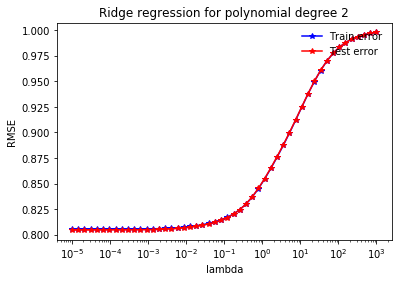

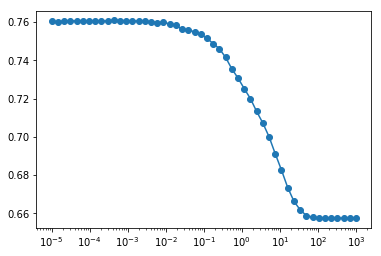

In [28]:
seed = 42
degree = 2
split_ratio = 0.9
ridge_regression_demo(x, y, degree, split_ratio, seed)

In [29]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    id_test = k_indices[k]
    id_train = k_indices[~(np.arange(k_indices.shape[0]) == k)].reshape(-1)
    x_test = x[id_test]
    x_train = x[id_train]
    y_test = y[id_test]
    y_train = y[id_train]
    # Standardize
    x_train_std = standardize(x_train)[0]
    x_test_std = standardize(x_test)[0]
    # Define feature matrix
    tx_train = build_poly(x_train_std, degree)
    tx_test = build_poly(x_test_std, degree)
    # ridge regression
    weight, loss_tr = ridge_regression(y_train, tx_train, lambda_)
    # calculate the loss for train and test data
    loss_te = compute_loss(y_test, tx_test, weight)
    accuracy = accuracy_ratio(predict_labels(weight, tx_test), y_test)

    return loss_tr, loss_te, accuracy

Best lambda from accuracy: 4.89e-07
Best lambda from error: 2.40e-06


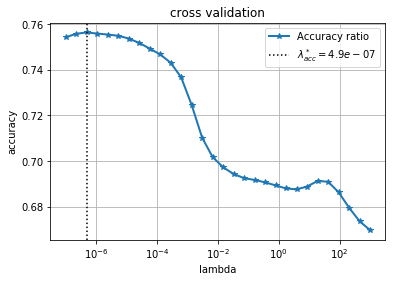

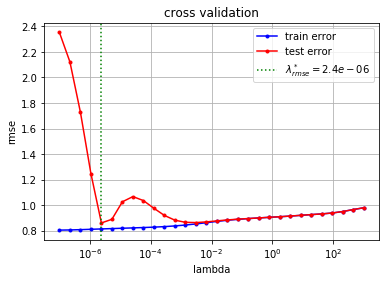

In [30]:
def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    best_l_err = lambds[np.argmin(mse_te)]
    print('Best lambda from error: %.2e'%best_l_err)
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.axvline(best_l_err, c = 'g', label = '$\lambda^*_{rmse}=%.1e$'%best_l_err, ls = ':')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=0)
    plt.grid(True)
    plt.savefig("../results/cross_validation")
def cross_validation_visualization_accuracy(lambdas, accuracies):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambdas, accuracies, lw =2, marker = '*', label = 'Accuracy ratio')
    best_l_acc = lambdas[np.argmax(accuracies)]
    plt.axvline(best_l_acc, c= 'k', label = '$\lambda^*_{acc}=%.1e$'%best_l_acc, ls = ':')
    print('Best lambda from accuracy: %.2e'%best_l_acc)
    plt.xlabel("lambda")
    plt.ylabel("accuracy")
    plt.title("cross validation")
    plt.legend(loc=0)
    plt.grid(True)
    plt.savefig("../results/cross_validation_accuracies")
def cross_validation_demo():
    seed = 42
    degree = 3
    k_fold = 4
    lambdas = np.logspace(-7, 3, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    std_tr = []
    std_te = []
    accuracies = []
    # cross validation
    for ind, lambda_ in enumerate(lambdas):
        x_validation = np.array([cross_validation(y, x, k_indices, k, lambda_, degree) for k in range(k_fold)])
        rmse_tr.append(np.mean(np.sqrt(2 * x_validation[:, 0])))
        rmse_te.append(np.mean(np.sqrt(2 * x_validation[:, 1])))
        std_tr.append(np.std(np.sqrt(2 * x_validation[:, 0])))
        std_te.append(np.std(np.sqrt(2 * x_validation[:, 1])))
        accuracies.append(np.mean(x_validation[:,2]))
    cross_validation_visualization_accuracy(lambdas, accuracies)
    plt.figure()
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()


# Bias-Variance test

In [31]:
def bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te):
    """visualize the bias variance decomposition."""
    rmse_tr_mean = np.expand_dims(np.mean(rmse_tr, axis=0), axis=0)
    rmse_te_mean = np.expand_dims(np.mean(rmse_te, axis=0), axis=0)
    print(rmse_te_mean, rmse_tr_mean)
    plt.plot(degrees,
             rmse_tr.T,
             'b',
             linestyle="-",
             color=([0.7, 0.7, 1]),
             label='train',
             linewidth=0.3)
    plt.plot(degrees,
             rmse_te.T,
             'r',
             linestyle="-",
             color=[1, 0.7, 0.7],
             label='test',
             linewidth=0.3)
    plt.plot(degrees,
             rmse_tr_mean.T,
             'b',
             linestyle="-",
             label='train',
             linewidth=3)
    plt.plot(degrees,
             rmse_te_mean.T,
             'r',
             linestyle="-",
             label='test',
             linewidth=3)
    plt.ylim(0.7, 1)
    plt.xlabel("degree")
    plt.ylabel("error")
    plt.title("Bias-Variance Decomposition")
    plt.savefig("bias_variance")


def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    ratio_train = 0.5
    degrees = range(1, 8)
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        # split data with a specific seed
        x_train, y_train, x_test, y_test = split_data(x, y, ratio_train, seed)
        x_train_std = standardize(x_train)[0]
        x_test_std = standardize(x_test)[0]
        for index_degrees, degree in enumerate(degrees):
            tx_train = build_poly(x_train_std, degree)
            tx_test = build_poly(x_test_std, degree)
            weight, loss_tr = ridge_regression(y_train, tx_train, 1.89e-05 )
            loss_te = compute_loss(y_test, tx_test, weight, kind='mse')
            rmse_tr[index_seed, index_degrees] = np.sqrt(2 * loss_tr)
            rmse_te[index_seed, index_degrees] = np.sqrt(2 * loss_te)
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)


bias_variance_demo()

KeyboardInterrupt: 

In [34]:
print(id_out_test.shape)
x_out_test_std = standardize_features(x_out_test)
x_out = x_out_test_std[0]
tx_out = build_poly(x_out, 2)

create_csv_submission(id_out_test, predict_labels(w_rr, tx_out) , '../results/rr_pred.csv')
create_csv_submission(id_out_test, predict_labels(w_gd, tx_out) , '../results/gd_pred_accel.csv')
create_csv_submission(id_out_test, predict_labels(w_lsq, tx_out) , '../results/lsq_pred.csv')
#create_csv_submission(id_out_test, predict_labels(w_sgd, tx_out) , '../results/sgd_pred_noadapt.csv')

(568238,)


# Logistic Regression

In [77]:
w_init = np.array([0]*tx_train.shape[1])
max_iter = 4000
gamma = 1e-7
w_lrgd, loss_lrgd = logistic_regression(y_train, tx_train, w_init, max_iter, gamma, pr=True, adapt_gamma = False)
lrgd_prediction = predict_labels(w_lrgd, tx_test)
acc_lrgd = accuracy_ratio(lrgd_prediction, y_test)
print('Accuracy ratio = %.3f'%acc_lrgd)
print('Test loss = %.3f'%compute_loss_logistic(y_test, tx_test, w_lrgd))
print('Train loss = %.3f'%loss_lrgd)

Logistic Regression GD (0/3999): loss=3119.1623125199
Logistic Regression GD (100/3999): loss=-5052.666973716754
Logistic Regression GD (200/3999): loss=-11433.464618887743
Logistic Regression GD (300/3999): loss=-17413.60415105426
Logistic Regression GD (400/3999): loss=-23223.98806948015
Logistic Regression GD (500/3999): loss=-28945.610910390023
Logistic Regression GD (600/3999): loss=-34614.76643112936
Logistic Regression GD (700/3999): loss=-40250.402858839385
Logistic Regression GD (800/3999): loss=-45863.44758469955
Logistic Regression GD (900/3999): loss=-51460.63998304881
Logistic Regression GD (1000/3999): loss=-57046.342020135344
Logistic Regression GD (1100/3999): loss=-62623.481785886215
Logistic Regression GD (1200/3999): loss=-68194.07948376483
Logistic Regression GD (1300/3999): loss=-73759.56306488346
Logistic Regression GD (1400/3999): loss=-79320.97905633446
Logistic Regression GD (1500/3999): loss=-84879.11791756989
Logistic Regression GD (1600/3999): loss=-90434.58

In [32]:
lambda_ = 10000
gamma = 1e-8
w_rlrgd, loss_rlrgd = reg_logistic_regression(y_train, tx_train, lambda_, w_init, max_iter, gamma, pr=True, adapt_gamma = False)
rlrgd_prediction = predict_labels(w_rlrgd, tx_test)
acc_rlrgd = accuracy_ratio(rlrgd_prediction, y_test)
print('Accuracy ratio = %.3f'%acc_rlrgd)
print('Test loss = %.3f'%compute_loss_logistic(y_test, tx_test, w_rlrgd))
print('Train loss = %.3f'%loss_rlrgd)

 Regularized Logistic Regression GD (0/99999): loss=3119.1623125199
 Regularized Logistic Regression GD (100/99999): loss=2688.691845895465
 Regularized Logistic Regression GD (200/99999): loss=2304.1297938103958
 Regularized Logistic Regression GD (300/99999): loss=1956.6286948875052
 Regularized Logistic Regression GD (400/99999): loss=1639.7748428355728
 Regularized Logistic Regression GD (500/99999): loss=1348.914140418746
 Regularized Logistic Regression GD (600/99999): loss=1080.5033867836107
 Regularized Logistic Regression GD (700/99999): loss=831.7359821070947
 Regularized Logistic Regression GD (800/99999): loss=600.3250439258538
 Regularized Logistic Regression GD (900/99999): loss=384.36877008910847
 Regularized Logistic Regression GD (1000/99999): loss=182.26125630421242
 Regularized Logistic Regression GD (1100/99999): loss=-7.369722867539792
 Regularized Logistic Regression GD (1200/99999): loss=-185.70792245373315
 Regularized Logistic Regression GD (1300/99999): loss=-

 Regularized Logistic Regression GD (11100/99999): loss=-4452.0831827090915
 Regularized Logistic Regression GD (11200/99999): loss=-4460.098721637905
 Regularized Logistic Regression GD (11300/99999): loss=-4467.930977109281
 Regularized Logistic Regression GD (11400/99999): loss=-4475.584434416149
 Regularized Logistic Regression GD (11500/99999): loss=-4483.06345635949
 Regularized Logistic Regression GD (11600/99999): loss=-4490.372287174869
 Regularized Logistic Regression GD (11700/99999): loss=-4497.515056305698
 Regularized Logistic Regression GD (11800/99999): loss=-4504.495782030524
 Regularized Logistic Regression GD (11900/99999): loss=-4511.318374951188
 Regularized Logistic Regression GD (12000/99999): loss=-4517.986641348391
 Regularized Logistic Regression GD (12100/99999): loss=-4524.504286410783
 Regularized Logistic Regression GD (12200/99999): loss=-4530.87491734338
 Regularized Logistic Regression GD (12300/99999): loss=-4537.1020463608065
 Regularized Logistic Reg

 Regularized Logistic Regression GD (22200/99999): loss=-4783.685681024971
 Regularized Logistic Regression GD (22300/99999): loss=-4784.385164656912
 Regularized Logistic Regression GD (22400/99999): loss=-4785.069888984767
 Regularized Logistic Regression GD (22500/99999): loss=-4785.7401696599845
 Regularized Logistic Regression GD (22600/99999): loss=-4786.396315447468
 Regularized Logistic Regression GD (22700/99999): loss=-4787.038628380373
 Regularized Logistic Regression GD (22800/99999): loss=-4787.667403911321
 Regularized Logistic Regression GD (22900/99999): loss=-4788.282931060018
 Regularized Logistic Regression GD (23000/99999): loss=-4788.885492557426
 Regularized Logistic Regression GD (23100/99999): loss=-4789.475364986581
 Regularized Logistic Regression GD (23200/99999): loss=-4790.05281892007
 Regularized Logistic Regression GD (23300/99999): loss=-4790.61811905435
 Regularized Logistic Regression GD (23400/99999): loss=-4791.171524340907
 Regularized Logistic Regr

 Regularized Logistic Regression GD (33200/99999): loss=-4813.809512281921
 Regularized Logistic Regression GD (33300/99999): loss=-4813.878320711301
 Regularized Logistic Regression GD (33400/99999): loss=-4813.94570566586
 Regularized Logistic Regression GD (33500/99999): loss=-4814.011696745802
 Regularized Logistic Regression GD (33600/99999): loss=-4814.076322931651
 Regularized Logistic Regression GD (33700/99999): loss=-4814.139612597307
 Regularized Logistic Regression GD (33800/99999): loss=-4814.201593522888
 Regularized Logistic Regression GD (33900/99999): loss=-4814.262292907268
 Regularized Logistic Regression GD (34000/99999): loss=-4814.321737380318
 Regularized Logistic Regression GD (34100/99999): loss=-4814.379953014953
 Regularized Logistic Regression GD (34200/99999): loss=-4814.436965338865
 Regularized Logistic Regression GD (34300/99999): loss=-4814.492799346009
 Regularized Logistic Regression GD (34400/99999): loss=-4814.547479507894
 Regularized Logistic Regr

 Regularized Logistic Regression GD (44300/99999): loss=-4816.814876021127
 Regularized Logistic Regression GD (44400/99999): loss=-4816.821712180339
 Regularized Logistic Regression GD (44500/99999): loss=-4816.828408159519
 Regularized Logistic Regression GD (44600/99999): loss=-4816.834966841185
 Regularized Logistic Regression GD (44700/99999): loss=-4816.841391048381
 Regularized Logistic Regression GD (44800/99999): loss=-4816.847683545903
 Regularized Logistic Regression GD (44900/99999): loss=-4816.853847041524
 Regularized Logistic Regression GD (45000/99999): loss=-4816.85988418716
 Regularized Logistic Regression GD (45100/99999): loss=-4816.8657975800215
 Regularized Logistic Regression GD (45200/99999): loss=-4816.871589763774
 Regularized Logistic Regression GD (45300/99999): loss=-4816.877263229618
 Regularized Logistic Regression GD (45400/99999): loss=-4816.882820417382
 Regularized Logistic Regression GD (45500/99999): loss=-4816.888263716602
 Regularized Logistic Reg

 Regularized Logistic Regression GD (55300/99999): loss=-4817.114457316294
 Regularized Logistic Regression GD (55400/99999): loss=-4817.115161664837
 Regularized Logistic Regression GD (55500/99999): loss=-4817.115851645603
 Regularized Logistic Regression GD (55600/99999): loss=-4817.116527552217
 Regularized Logistic Regression GD (55700/99999): loss=-4817.117189672299
 Regularized Logistic Regression GD (55800/99999): loss=-4817.117838287572
 Regularized Logistic Regression GD (55900/99999): loss=-4817.118473674004
 Regularized Logistic Regression GD (56000/99999): loss=-4817.119096101899
 Regularized Logistic Regression GD (56100/99999): loss=-4817.1197058360385
 Regularized Logistic Regression GD (56200/99999): loss=-4817.120303135764
 Regularized Logistic Regression GD (56300/99999): loss=-4817.120888255119
 Regularized Logistic Regression GD (56400/99999): loss=-4817.121461442951
 Regularized Logistic Regression GD (56500/99999): loss=-4817.1220229430055
 Regularized Logistic R

 Regularized Logistic Regression GD (66400/99999): loss=-4817.145505562739
 Regularized Logistic Regression GD (66500/99999): loss=-4817.145577377308
 Regularized Logistic Regression GD (66600/99999): loss=-4817.145647732413
 Regularized Logistic Regression GD (66700/99999): loss=-4817.1457166577575
 Regularized Logistic Regression GD (66800/99999): loss=-4817.145784182436
 Regularized Logistic Regression GD (66900/99999): loss=-4817.145850334957
 Regularized Logistic Regression GD (67000/99999): loss=-4817.145915143238
 Regularized Logistic Regression GD (67100/99999): loss=-4817.145978634638
 Regularized Logistic Regression GD (67200/99999): loss=-4817.146040835946
 Regularized Logistic Regression GD (67300/99999): loss=-4817.146101773415
 Regularized Logistic Regression GD (67400/99999): loss=-4817.146161472758
 Regularized Logistic Regression GD (67500/99999): loss=-4817.14621995917
 Regularized Logistic Regression GD (67600/99999): loss=-4817.14627725732
 Regularized Logistic Regr

 Regularized Logistic Regression GD (77400/99999): loss=-4817.148671820955
 Regularized Logistic Regression GD (77500/99999): loss=-4817.148679351146
 Regularized Logistic Regression GD (77600/99999): loss=-4817.148686728736
 Regularized Logistic Regression GD (77700/99999): loss=-4817.148693956828
 Regularized Logistic Regression GD (77800/99999): loss=-4817.148701038446
 Regularized Logistic Regression GD (77900/99999): loss=-4817.148707976573
 Regularized Logistic Regression GD (78000/99999): loss=-4817.148714774111
 Regularized Logistic Regression GD (78100/99999): loss=-4817.148721433914
 Regularized Logistic Regression GD (78200/99999): loss=-4817.148727958781
 Regularized Logistic Regression GD (78300/99999): loss=-4817.148734351444
 Regularized Logistic Regression GD (78400/99999): loss=-4817.148740614584
 Regularized Logistic Regression GD (78500/99999): loss=-4817.148746750831
 Regularized Logistic Regression GD (78600/99999): loss=-4817.148752762758
 Regularized Logistic Reg

In [1]:
!jt -r -cellw=90

Reset css and font defaults in:
/home/daniel/.jupyter/custom &
/home/daniel/.local/share/jupyter/nbextensions
